# Taller de Machine Learning con R
## Bloque 3: Regresiones

Descargamos primero la base de datos

In [2]:
#install.packages('titanic')
library('titanic')

Ya viene dividida en 2 conjuntos de entrenamiento y prueba. Sin embargo, como se mencionó anteriormente se tomará la base de train como la base total.

In [3]:
database<-titanic_train
head(database)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


### Ejercicio: ¿Cuál es el tamaño total de la base? Aleatorice la base de datos como se vio anteriormente. Establezca su semilla aleatoria en 150

In [4]:
dim(database)

[1] 891  12

In [141]:
set.seed(400)

In [5]:
database<-database[sample(1:nrow(database)),2:12]
head(database)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,,C
562,0,3,"Sivic, Mr. Husein",male,40,0,0,349251,7.8958,,S
492,0,3,"Windelov, Mr. Einar",male,21,0,0,SOTON/OQ 3101317,7.2500,,S
21,0,2,"Fynney, Mr. Joseph J",male,35,0,0,239865,26.0000,,S
271,0,1,"Cairns, Mr. Alexander",male,NA,0,0,113798,31.0000,,S
312,1,1,"Ryerson, Miss. Emily Borie",female,18,2,2,PC 17608,262.3750,B57 B59 B63 B66,C


Hay bastantes espacios en blanco (NA) y además es necesario hacer un preprocesamiento de la base de datos. Verificamos cuántos NAs hay y en qué características

In [6]:
dim(database)

[1] 891  11

In [144]:
colSums(is.na(database))

Survived   Pclass     Name      Sex      Age    SibSp    Parch   Ticket 
       0        0        0        0      177        0        0        0 
    Fare    Cabin Embarked 
       0        0        0

### Ejercicio 2: Elimine los NA de la base de datos

In [7]:
database<-na.omit(database)
head(database)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,,C
562,0,3,"Sivic, Mr. Husein",male,40,0,0,349251,7.8958,,S
492,0,3,"Windelov, Mr. Einar",male,21,0,0,SOTON/OQ 3101317,7.2500,,S
21,0,2,"Fynney, Mr. Joseph J",male,35,0,0,239865,26.0000,,S
312,1,1,"Ryerson, Miss. Emily Borie",female,18,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
819,0,3,"Holm, Mr. John Fredrik Alexander",male,43,0,0,C 7075,6.4500,,S


Verificamos si aún quedan NAs

In [8]:
colSums(is.na(database))

Survived   Pclass     Name      Sex      Age    SibSp    Parch   Ticket 
       0        0        0        0        0        0        0        0 
    Fare    Cabin Embarked 
       0        0        0

##### NOTA: No se considera siempre una buena práctica eliminar de golpe todos los datos ambigüos que se encuentren en una base. También es posible estimarlos utilizando alguna otra técnica de Machine Learning

Usaremos ahora una paquetería para usar datos categóricos de forma más sencilla

In [9]:
#install.packages('plyr')
library('plyr')

Vamos a cambiar las categorías de $Sex$ con la siguiente regla: 'male=0','female'=1 utilizando la función revalue de la paquetería plyr

In [10]:
database$Sex<-revalue(factor(database$Sex),c('male'=0,'female'=1))

In [11]:
head(database)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14,1,0,237736,30.0708,,C
562,0,3,"Sivic, Mr. Husein",0,40,0,0,349251,7.8958,,S
492,0,3,"Windelov, Mr. Einar",0,21,0,0,SOTON/OQ 3101317,7.2500,,S
21,0,2,"Fynney, Mr. Joseph J",0,35,0,0,239865,26.0000,,S
312,1,1,"Ryerson, Miss. Emily Borie",1,18,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
819,0,3,"Holm, Mr. John Fredrik Alexander",0,43,0,0,C 7075,6.4500,,S


### Ejercicio 3:  Cambie las categoría de "Embarked" tomando en cuenta el orden en que abordaron los pasajeros el Titanic iniciando desde cero. A recordar:
1. Southampton (S)=0
2. Cherburgo (C)=1
3. Queenstown (Q)=2

In [12]:
database$Embarked<-revalue(factor(database$Embarked),c('S'=0,'C'=1,'Q'=2))

In [13]:
head(database)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14,1,0,237736,30.0708,,1
562,0,3,"Sivic, Mr. Husein",0,40,0,0,349251,7.8958,,0
492,0,3,"Windelov, Mr. Einar",0,21,0,0,SOTON/OQ 3101317,7.2500,,0
21,0,2,"Fynney, Mr. Joseph J",0,35,0,0,239865,26.0000,,0
312,1,1,"Ryerson, Miss. Emily Borie",1,18,2,2,PC 17608,262.3750,B57 B59 B63 B66,1
819,0,3,"Holm, Mr. John Fredrik Alexander",0,43,0,0,C 7075,6.4500,,0


### Ejercicio 4: ¿Qué porcentaje de datos queda? Gener un subconjunto de entrenamiento con el 70% de los datos restantes y de prueba con el 30% sobrante. 

Únicamente dividimos el total de la nueva base de datos con el total de la base original

In [14]:
data_lost<-dim(database)[1]/dim(titanic_train)[1]
data_lost

[1] 0.8013468

Se establecen porcentajes y tamaños

In [15]:
train_perc<-0.7
test_perc<-0.3
train_size<-dim(database)[1]*train_perc
test_size<-dim(database)[1]*test_perc

Puede ser que al final, no se tenga un número cerrado para el tamaño de ambas bases

In [16]:
train_size

[1] 499.8

In [155]:
test_size

[1] 214.2

Simplemente truncamos el valor hacia abajo o arriba para tener una cantidad cerrada.

In [19]:
train_size<-ceiling(train_size)
train_size

[1] 500

In [17]:
test_size<-floor(test_size)
test_size

[1] 214

Recordemos que el tamaño total de la base antes de la partición es:

In [18]:
dim(database)

[1] 714  11

Finalmente creamos ambas bases de datos

In [20]:
train<-database[1:train_size,]
test<-database[(train_size+1):(train_size+test_size),]

In [21]:
tail(train)
print(dim(train))

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
754,0,3,"Jonkoff, Mr. Lalio",0,23,0,0,349204,7.8958,,0
531,1,2,"Quick, Miss. Phyllis May",1,2,1,1,26360,26.0000,,0
279,0,3,"Rice, Master. Eric",0,7,4,1,382652,29.1250,,2
229,0,2,"Fahlstrom, Mr. Arne Jonas",0,18,0,0,236171,13.0000,,0
642,1,1,"Sagesser, Mlle. Emma",1,24,0,0,PC 17477,69.3000,B35,1
430,1,3,"Pickard, Mr. Berk (Berk Trembisky)",0,32,0,0,SOTON/O.Q. 392078,8.0500,E10,0


[1] 500  11


In [161]:
head(test)
print(dim(test))

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
131,0,3,"Drazenoic, Mr. Jozef",0,33,0,0,349241,7.8958,,1
133,0,3,"Robins, Mrs. Alexander A (Grace Charity Laury)",1,47,1,0,A/5. 3337,14.5000,,0
725,1,1,"Chambers, Mr. Norman Campbell",0,27,1,0,113806,53.1000,E8,0
1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,,0
748,1,2,"Sinkkonen, Miss. Anna",1,30,0,0,250648,13.0000,,0
490,1,3,"Coutts, Master. Eden Leslie ""Neville""",0,9,1,1,C.A. 37671,15.9000,,0


[1] 214  11


### Ejercicio 5: Crear un Data Frame con columnas que contengan los siguientes valores y orden: Age|Fare|Survived para train 

In [22]:
train_A<-train[c('Age','Fare','Survived')]
head(train_A)

,Age,Fare,Survived
10,14,30.0708,1
562,40,7.8958,0
492,21,7.2500,0
21,35,26.0000,0
312,18,262.3750,1
819,43,6.4500,0


Trataremos de visualizar un poco las relaciones entre estas dos variables y la supervivencia

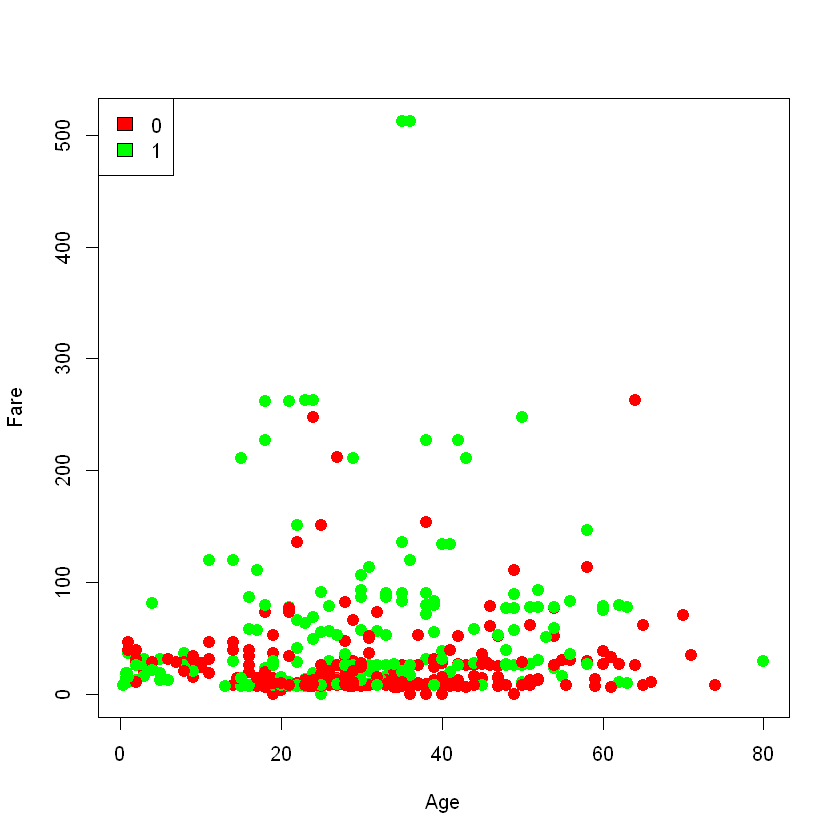

In [23]:
colores <- c("red", "green")
plot(train_A[c('Age','Fare')], pch = 20,  cex = 2,
     col = colores[factor(train_A$Survived)])
par(xpd = TRUE)
legend("topleft", fill = colores, 
       legend = c( levels(factor(train_A$Survived))))

### Ejercicio 6: Generar una base de datos de la siguiente forma Fare|Survived y Llamarla train_B. Luego graficar en el eje "x" a fare, en el "y" a Survived

In [24]:
train_B<-train[c('Fare','Survived')]
head(train_B)

,Fare,Survived
10,30.0708,1
562,7.8958,0
492,7.2500,0
21,26.0000,0
312,262.3750,1
819,6.4500,0


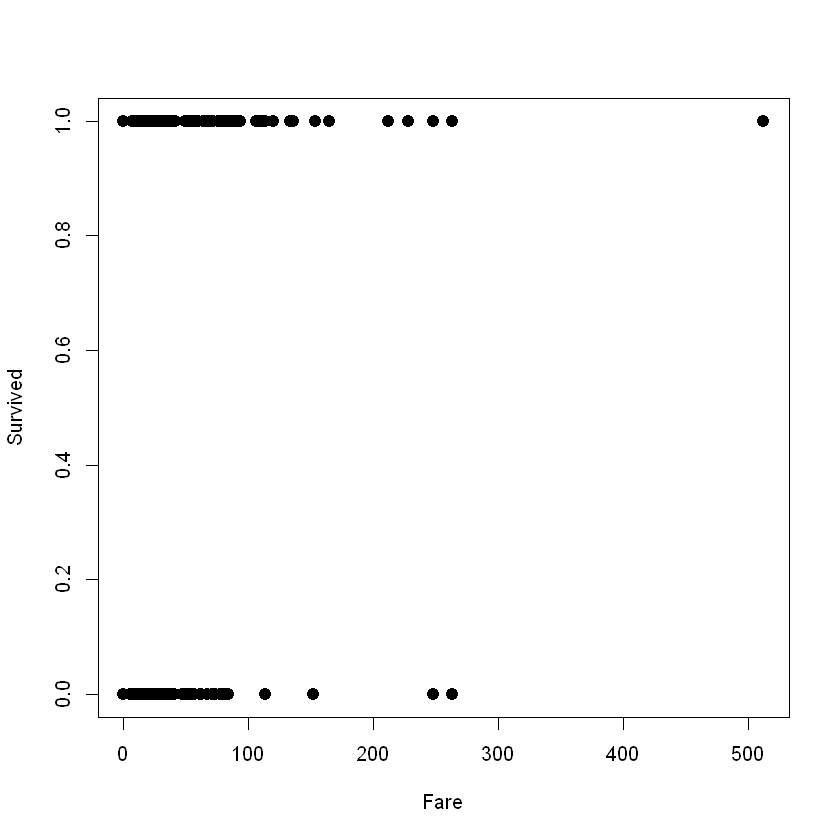

In [165]:
plot(train_B[c('Fare','Survived')], pch = 20,  cex = 2)

### ¿Cómo puede funcionar una regresión para clasificar?

Recordando el modelo lineal simple:

$f(x,\theta)=\theta_0+\theta_1 x$

Donde:
1. Intercepto = $\theta_0$
2. Pendiente = $\theta_1$

In [25]:
linearmodel <- lm(Survived~Fare, data = train_B)
linearmodel$coefficients

(Intercept)        Fare 
0.345904136 0.002262324

Ahora creamos nuestro vector de $\theta$s transformando los coeficientes en datos numéericos

In [26]:
theta<-as.numeric(linearmodel$coefficients)
theta

[1] 0.345904136 0.002262324

Aplicamos la fórmula arriba puesta

In [27]:
x<-train_B$Fare
linearformula<-theta[1]+theta[2]*x

Procedemos a graficar

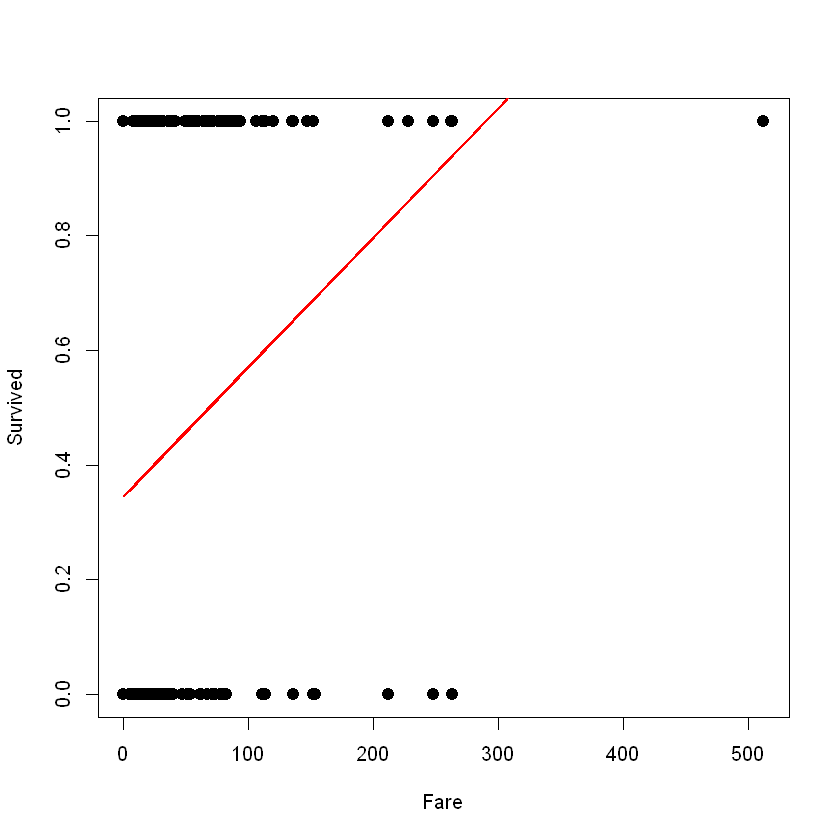

In [28]:
plot(train_B[c('Fare','Survived')], pch = 20,  cex = 2)
lines(x, linearformula, col="red", lwd=2)

## ¿Qué está mal aquí?

El modelo logístico es de la siguiente forma:
$f(x,\theta)=\frac{1}{1+e^{-(\theta_0+\theta_1x)}}$

In [29]:
logisticmodel<-glm(Survived~Fare, data = train_B,family=binomial)
logisticmodel$coefficients

(Intercept)        Fare 
-0.79705695  0.01553804

Par ahorrarnos todo el "show" anterior, haremos directamente la gráfica de ajuste mediante ggplot2..(lo siento)

In [30]:
library('ggplot2')

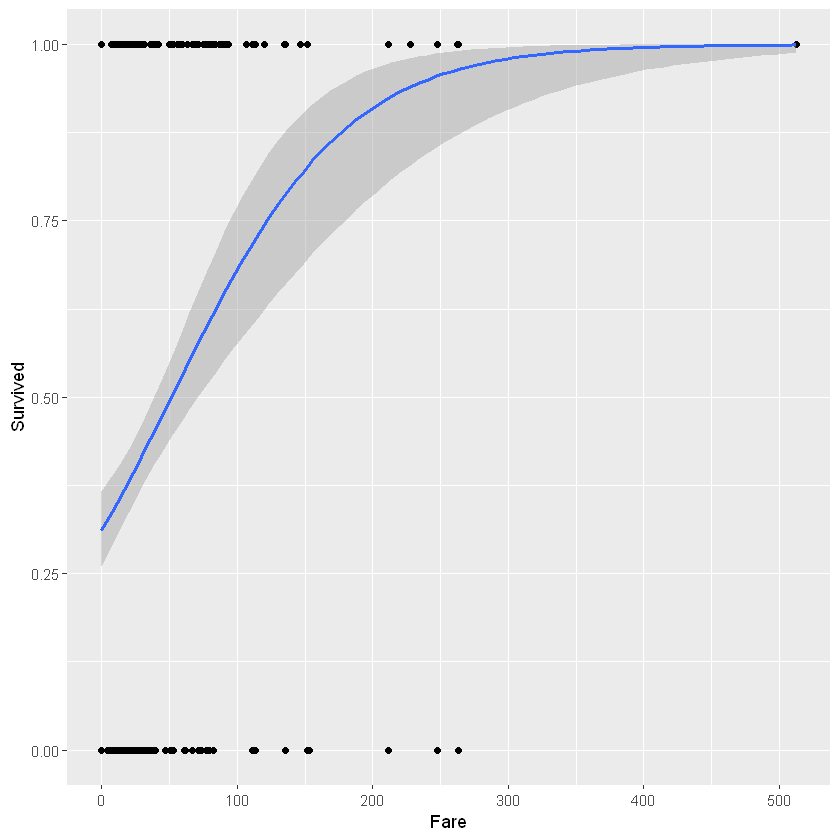

In [32]:
ggplot(train_B, aes(x=Fare, y=Survived)) + geom_point()+
    stat_smooth(method="glm", method.args=list(family="binomial"),se=TRUE)

Procedemos a generar predicciones del entrenamiento. Es decir $\bar{y}_{train}$. Primero generamos el vector de predicciones

In [33]:
train[c('Probs')]<-data.frame(predict(logisticmodel,
                                      train_B,type="response"))
head(train[c('Probs')])

,Probs
10,0.4182855
562,0.3375186
492,0.3352786
21,0.4029790
312,0.9637271
819,0.3325140


Ahora comparamos con los resultados de las predicciones con los valores de train

In [34]:
compare<-train[c('Survived','Probs')]
head(compare)

,Survived,Probs
10,1,0.4182855
562,0,0.3375186
492,0,0.3352786
21,0,0.4029790
312,1,0.9637271
819,0,0.3325140


Se aplicará la regla de decisión. Si la probabilidad es mayor a 0.5, entonces se habrá sobrevivido y será 1. De lo contrario habrá ocurrido una muerte y será 0

In [43]:
Prediction<-vector()
for(i in 1:dim(train)[1])
{
    if(compare[i,2]>0.5)
    {
            Prediction[i]<-1
    }
    else
    {
            Prediction[i]<-0
    }    
}
compare[c('Prediction')]<-Prediction
head(compare)

,Survived,Probs,Prediction,Accuracy
10,1,0.4182855,0,0
562,0,0.3375186,0,1
492,0,0.3352786,0,1
21,0,0.4029790,0,1
312,1,0.9637271,1,1
819,0,0.3325140,0,1


In [37]:
Accuracy<-vector()
for(i in 1:dim(train)[1])
{
    if(compare[i,1]==compare[i,3])
    {
            Accuracy[i]<-1
    }
    else
    {
            Accuracy[i]<-0
    }    
}
compare[c('Accuracy')]<-Accuracy
head(compare)

,Survived,Probs,Prediction,Accuracy
10,1,0.4182855,0,0
562,0,0.3375186,0,1
492,0,0.3352786,0,1
21,0,0.4029790,0,1
312,1,0.9637271,1,1
819,0,0.3325140,0,1


Veremos ahora la forma de calcular el Accuracy y MSE usando la paquetería MLmetrics

In [39]:
library('MLmetrics')

In [45]:
Accuracy(compare[c('Prediction')][,1],
         compare[c('Survived')][,1])

[1] 0.666

In [46]:
MSE(compare[c('Prediction')][,1],compare[c('Survived')][,1])

[1] 0.334

### Ejercicio 7: Hacer también la predicción para la base de testing

Se procederá en este caso a calcular  $\bar{y}_{test}$

In [49]:
test[c('Probs')]<-predict(logisticmodel,test,type="response")
compare_test<-test[c('Survived','Probs')]
head(compare_test)

,Survived,Probs
41,0,0.3430269
44,1,0.4623222
464,0,0.3554742
873,0,0.3275324
72,0,0.4829260
136,0,0.3627901


Generamos regla de evaluación

In [50]:
Prediction_test<-vector()
for(i in 1:dim(test)[1])
{
    if(compare_test[i,2]>0.5)
    {
            Prediction_test[i]<-1
    }
    else
    {
            Prediction_test[i]<-0
    }    
}
compare_test[c('Prediction')]<-Prediction_test
head(compare_test)

,Survived,Probs,Prediction
41,0,0.3430269,0
44,1,0.4623222,0
464,0,0.3554742,0
873,0,0.3275324,0
72,0,0.4829260,0
136,0,0.3627901,0


Finalmente calculamos Accuracy y MSE

In [51]:
Accuracy(compare_test[c('Prediction')][,1],
         compare_test[c('Survived')][,1])

[1] 0.7009346

In [52]:
MSE(compare[c('Prediction')][,1],compare[c('Survived')][,1])

[1] 0.334

### Ejercicio 8: Generar una base de datos de la siguiente forma: Pclass|Sex|Age|Fare|Survived, llamarla train_C, entrenar. Luego predecir con la base de test_C, calcular Accuracy y MSE.

### HINT: Cuando se quiere usar un modelo logístico con n variables se hace de esta forma: 
#### model<-glm(y~x1+x2+x3+...xn, data=train_X, family=binomial)

Primero se crea la base de datos pedida para entrenar

In [53]:
train_C<-train[c('Pclass','Sex','Age','Fare','Survived')]
head(train_C)

,Pclass,Sex,Age,Fare,Survived
10,2,1,14,30.0708,1
562,3,0,40,7.8958,0
492,3,0,21,7.2500,0
21,2,0,35,26.0000,0
312,1,1,18,262.3750,1
819,3,0,43,6.4500,0


In [54]:
logisticmodel_C<-glm(Survived~Pclass+Sex+Age+Fare, data = train_C,family=binomial)

In [68]:
summary(logisticmodel_C)


Call:
glm(formula = Survived ~ Pclass + Sex + Age + Fare, family = binomial, 
    data = train_C)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4478  -0.6942  -0.4255   0.6563   2.3193  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  4.522976   0.662226   6.830 8.49e-12 ***
Pclass      -1.136436   0.184096  -6.173 6.70e-10 ***
Sex0        -2.561969   0.246628 -10.388  < 2e-16 ***
Age         -0.026273   0.008718  -3.014  0.00258 ** 
Fare         0.001417   0.002443   0.580  0.56176    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 682.74  on 499  degrees of freedom
Residual deviance: 463.05  on 495  degrees of freedom
AIC: 473.05

Number of Fisher Scoring iterations: 4


Generamos el $\bar{y}_{train}$ correspondiente

In [55]:
train_C[c('Probs')]<-data.frame(predict(logisticmodel_C,train_C
                                        ,type="response"))
head(train_C[c('Probs')])

,Probs
10,0.87268477
562,0.07670196
492,0.12028270
21,0.23244411
312,0.96392954
819,0.07116745


In [56]:
compare_C<-train_C[c('Survived','Probs')]
head(compare_C)

,Survived,Probs
10,1,0.87268477
562,0,0.07670196
492,0,0.12028270
21,0,0.23244411
312,1,0.96392954
819,0,0.07116745


In [57]:
Prediction_C<-vector()
for(i in 1:dim(train_C)[1])
{
    if(compare_C[i,2]>0.5)
    {
            Prediction_C[i]<-1
    }
    else
    {
            Prediction_C[i]<-0
    }    
}
compare_C[c('Prediction')]<-Prediction_C
head(compare_C)

,Survived,Probs,Prediction
10,1,0.87268477,1
562,0,0.07670196,0
492,0,0.12028270,0
21,0,0.23244411,0
312,1,0.96392954,1
819,0,0.07116745,0


In [58]:
Accuracy(compare_C[c('Prediction')][,1],compare_C[c('Survived')][,1])

[1] 0.784

In [59]:
MSE(compare_C[c('Prediction')][,1],compare_C[c('Survived')][,1])

[1] 0.216

Generamos la base de testing

In [60]:
test_C<-test[c('Pclass','Sex','Age','Fare','Survived')]
head(test_C)

,Pclass,Sex,Age,Fare,Survived
41,3,1,40,9.4750,0
44,2,1,3,41.5792,1
464,2,0,48,13.0000,0
873,1,0,33,5.0000,0
72,3,1,16,46.9000,0
136,2,0,23,15.0458,0


Generamos el $\bar{y}_{test}$ correspondiente

In [61]:
test_C[c('Probs')]<-data.frame(predict(logisticmodel_C,test_C,type="response"))
head(test_C[c('Probs')])

,Probs
41,0.5190365
44,0.9029309
464,0.1744321
873,0.4911642
72,0.6813063
136,0.2901173


In [62]:
compare_test_C<-test_C[c('Survived','Probs')]
head(compare_test_C)

,Survived,Probs
41,0,0.5190365
44,1,0.9029309
464,0,0.1744321
873,0,0.4911642
72,0,0.6813063
136,0,0.2901173


In [63]:
Prediction_test_C<-vector()
for(i in 1:dim(test_C)[1])
{
    if(compare_C[i,2]>0.5)
    {
            Prediction_test_C[i]<-1
    }
    else
    {
            Prediction_test_C[i]<-0
    }    
}
compare_test_C[c('Prediction')]<-Prediction_test_C
head(compare_test_C)

,Survived,Probs,Prediction
41,0,0.5190365,1
44,1,0.9029309,0
464,0,0.1744321,0
873,0,0.4911642,0
72,0,0.6813063,1
136,0,0.2901173,0


Finalmente calculamos Accuracy y MSE

In [64]:
Accuracy(compare_test_C[c('Prediction')][,1],compare_test_C[c('Survived')][,1])

[1] 0.5093458

In [65]:
MSE(compare_test_C[c('Prediction')][,1],compare_test_C[c('Survived')][,1])

[1] 0.4906542